# Clustering data with Unsupervised Machine Learning

**Aim**: The aim of this notebook is to cluster data into distinct groups or clusters when the data has no labels using Unsupervised Machine Learning Techniques. 

## Table of contents 

1. Implementing the K-Means algorithm in scikit-learn
2. Feature Engineering for optimization
3. Cluster Visualization
4. Unsupervised to Supervised Learning

## Package Requirements

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.manifold import TSNE
#from sklearn.externals.six import StringIO
from six import StringIO

**Data Cleaning**

In [3]:
#Reading in the dataset

df = pd.read_csv('fraud_prediction.csv')


#Dropping the target feature & the index

df = df.drop(['Unnamed: 0', 'isFraud'], axis = 1)

## Implementing the K-Means algorithm in scikit-learn

In [4]:
#Initializing K-means with 2 clusters

k_means = KMeans(n_clusters = 2)

#Fitting the model on the data

k_means.fit(df)

/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [5]:
#Extracting labels 

target_labels = k_means.predict(df)

#Printing the labels

target_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

**Evaluating the inertia of the model**

In [6]:
# Inertia of present model

k_means.inertia_

4.6805753643592256e+17

/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raultoscanomira

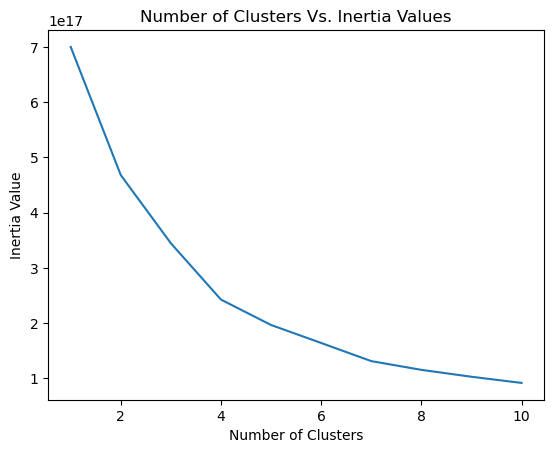

In [7]:
#Initialize a list of clusters from 1 to 10 clusters 

clusters = [1,2,3,4,5,6,7,8,9,10]

#Create an empty list in order to store the inertia values 

inertia_values = []

for cluster in clusters:
    
    #Build a k-means model for each cluster value
    
    k_means = KMeans(n_clusters = cluster)
    
    #Fit the model to the data
    
    k_means.fit(df)
    
    # Store inertia value of each model into the empty list 
    
    inertia_values.append(k_means.inertia_)
    
# Plot the result

sns.lineplot(x = clusters, y = inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Number of Clusters Vs. Inertia Values')
plt.show()

## Feature Engineering for optimization

**Scaling**

In [8]:
#Setting up the standard scaler 

scale_data = StandardScaler()

#Scaling the data

scale_data.fit(df)

df_scaled = scale_data.transform(df)

In [9]:
#Applying the K-Means algorithm on the scaled data

#Initializing K-means with 2 clusters

k_means = KMeans(n_clusters = 2)

#Fitting the model on the data

k_means.fit(df_scaled)

/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [10]:
# Inertia of present model

k_means.inertia_

257261.02987593578

**Finding the optimal number of clusters post scaling**

/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raultoscanomira

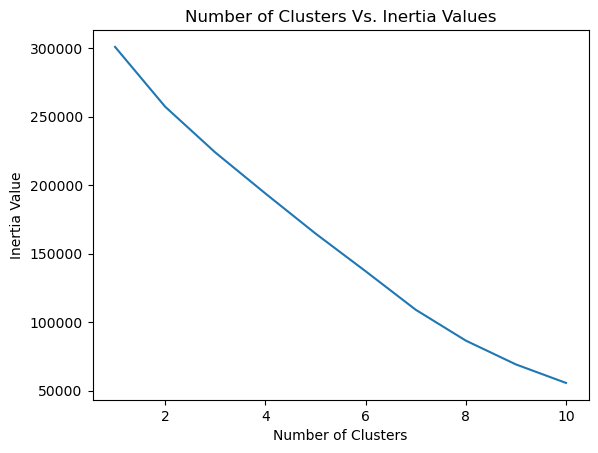

In [11]:
#Initialize a list of clusters from 1 to 10 clusters 

clusters = [1,2,3,4,5,6,7,8,9,10]

#Create an empty list in order to store the inertia values 

inertia_values = []

for cluster in clusters:
    
    #Build a k-means model for each cluster value
    
    k_means = KMeans(n_clusters = cluster)
    
    #Fit the model to the data
    
    k_means.fit(df_scaled)
    
    # Store inertia value of each model into the empty list 
    
    inertia_values.append(k_means.inertia_)
    
# Plot the result

sns.lineplot(x = clusters, y = inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Number of Clusters Vs. Inertia Values')
plt.show()

**Principal component analysis**

In [12]:
#Initialize a PCA model with 5 features 

pca_model = PCA(n_components = 5)

In [13]:
#Fit the model to the dataframe

pca_model.fit(df_scaled)

PCA(n_components=5)

In [14]:
#Transform the features so that it is de-correlated

pca_transform = pca_model.transform(df_scaled)

In [15]:
#Check to see if there are only 5 features

pca_transform.shape

(27353, 5)

**Fitting and evaluating a new K-Means model**

In [16]:
#Applying the K-Means algorithm on the scaled data

#Initializing K-means with 2 clusters

k_means = KMeans(n_clusters = 2)

#Fitting the model on the data

k_means.fit(pca_transform)

/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [17]:
# Inertia of present model

k_means.inertia_

178926.5955244397

/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raultoscanomira

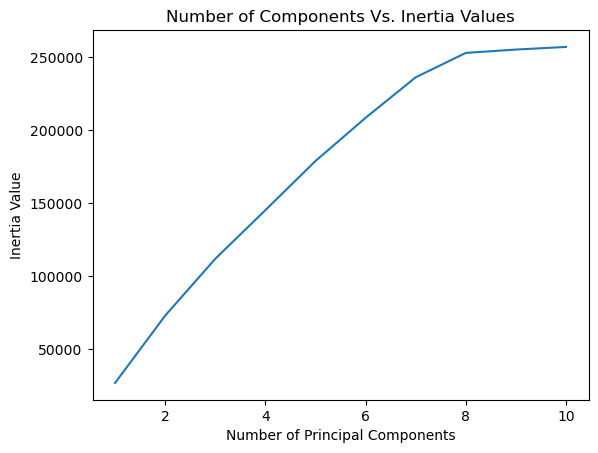

In [18]:
#Initialize a list of principal components

components = [1,2,3,4,5,6,7,8,9,10]

#Create an empty list in order to store the inertia values 

inertia_values = []

for comp in components:
    
    #Initialize a PCA model

    pca_model = PCA(n_components = comp)
    
    #Fit the model to the dataframe

    pca_model.fit(df_scaled)
    
    #Transform the features so that it is de-correlated

    pca_transform = pca_model.transform(df_scaled)
    
    #Build a k-means model 
    
    k_means = KMeans(n_clusters = 2)
    
    #Fit the model to the data
    
    k_means.fit(pca_transform)
    
    # Store inertia value of each model into the empty list 
    
    inertia_values.append(k_means.inertia_)
    
# Plot the result

sns.lineplot(x = components, y = inertia_values)
plt.xlabel('Number of Principal Components')
plt.ylabel('Inertia Value')
plt.title('Number of Components Vs. Inertia Values')
plt.show()

## Cluster Visualization

**t-SNE**

In [19]:
#Reading in the dataset

df = pd.read_csv('fraud_prediction.csv')

#Dropping the target feature & the index

df = df.drop(['Unnamed: 0', 'isFraud'], axis = 1)

In [20]:
#Initializing K-means with 2 clusters

k_means = KMeans(n_clusters = 2)

#Fitting the model on the data

k_means.fit(df)

/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [21]:
#Extracting labels 

target_labels = k_means.predict(df)

In [22]:
#Converting the labels to a series 

target_labels = pd.Series(target_labels)

In [23]:
#Merging the labels to the dataset

df = pd.merge(df, pd.DataFrame(target_labels), left_index=True, right_index=True)

In [24]:
#Renaming the target 

df['fraud'] = df[0]
df = df.drop([0], axis = 1)

In [25]:
#Creating the features

features = df.drop('fraud', axis = 1).values

target = df['fraud'].values

In [26]:
#Initialize a TSNE object

tsne_object = TSNE()

#Fit and transform the features using the TSNE object

transformed = tsne_object.fit_transform(features)

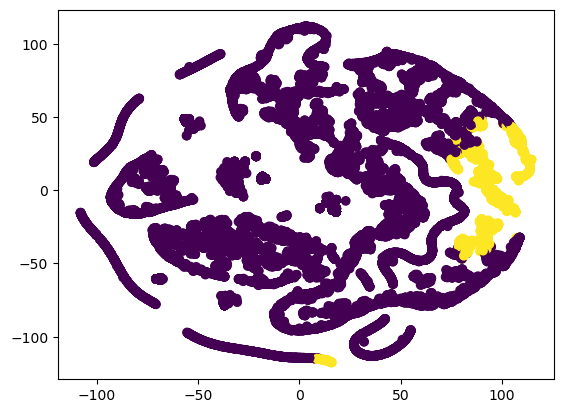

In [27]:
#Creating a t-SNE visualization

x_axis = transformed[:,0]


y_axis = transformed[:,1]


plt.scatter(x_axis, y_axis, c = target)

plt.show()

**Heirarchial Clustering**

In [28]:
#Creating an array of 4 features

array = np.array([[1,2,3,4], [5,6,7,8], [2,3,4,5], [5,6,4,3]])

In [29]:
feature_names = ['a', 'b', 'c', 'd']

In [30]:
feature_names

['a', 'b', 'c', 'd']

In [31]:
#Creating clusters

clusters = linkage(array, method = 'complete')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 2.0, 2.0, 0.0],
  [0.0, 5.830951894845301, 5.830951894845301, 0.0],
  [2.0, 8.0, 8.0, 5.830951894845301]],
 'ivl': ['a', 'c', 'b', 'd'],
 'leaves': [0, 2, 1, 3],
 'color_list': ['C1', 'C0', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C0', 'C0']}

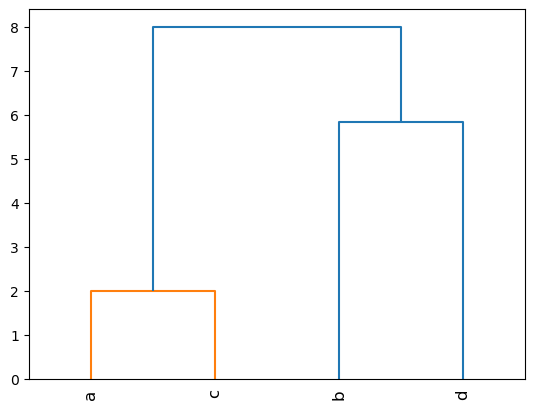

In [32]:
#Creating a dendrogram

dendrogram(clusters, labels = feature_names, leaf_rotation = 90)

In [33]:
plt.show()

## Unsupervised to supervised learning

In [34]:
#Reading in the dataset

df = pd.read_csv('fraud_prediction.csv')

#Dropping the target feature & the index

df = df.drop(['Unnamed: 0', 'isFraud'], axis = 1)

In [35]:
#Initializing K-means with 2 clusters

k_means = KMeans(n_clusters = 2)

#Fitting the model on the data

k_means.fit(df)

/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [36]:
#Extracting labels 

target_labels = k_means.predict(df)

In [37]:
#Converting the labels to a series 

target_labels = pd.Series(target_labels)

In [38]:
#Merging the labels to the dataset

df = pd.merge(df, pd.DataFrame(target_labels), left_index=True, right_index=True)

**Building the decision tree**

In [39]:
#Renaming the target 

df['fraud'] = df[0]
df = df.drop([0], axis = 1)

In [40]:
#Initializing an empty DT classifier with a random state value of 42

dt_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 42)

In [41]:
#Creating the features

features = df.drop('fraud', axis = 1).values

target = df['fraud'].values

In [42]:
#Fitting the classifier on the training data 

dt_classifier.fit(features, target)

DecisionTreeClassifier(random_state=42)

In [45]:
#Creating a dataframe with the features only

features = df.drop('fraud', axis = 1)

In [46]:
dot_data = tree.export_graphviz(dt_classifier, out_file=None, feature_names= features.columns)

In [47]:
# Draw graph

graph = pydotplus.graph_from_dot_data(dot_data)

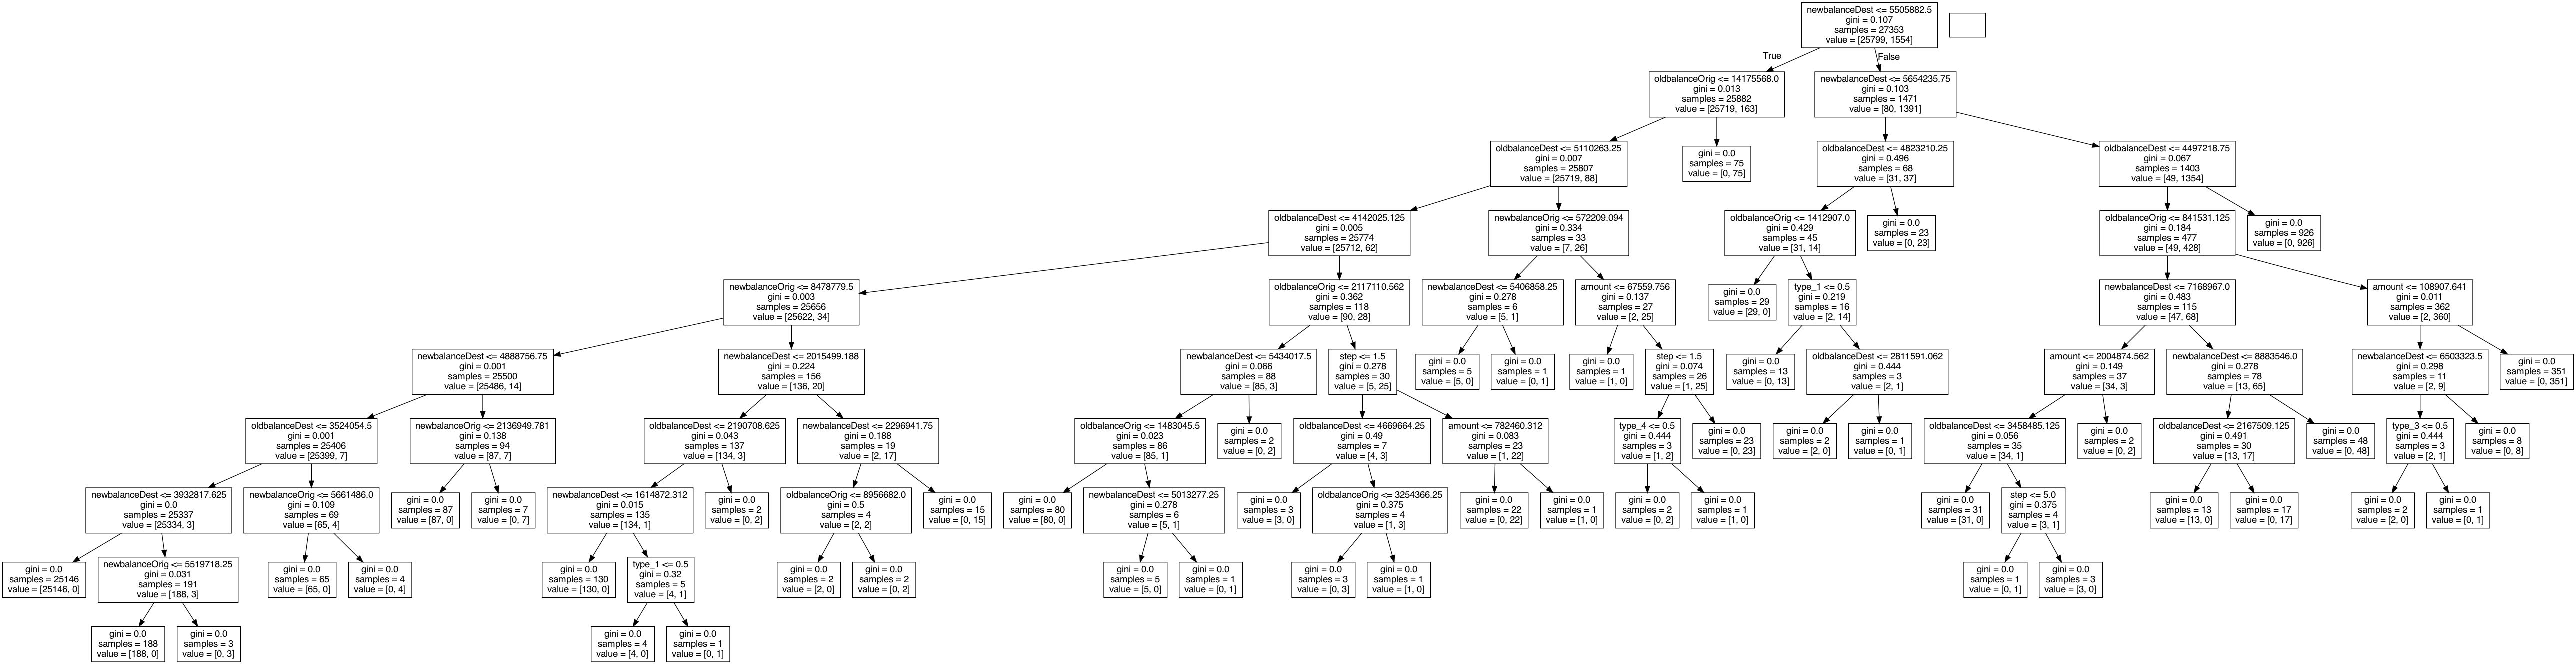

In [48]:
#Show graph 

Image(graph.create_png())